In [1]:
## https://truman.tistory.com/103 그래프 연습!!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:\windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

# 5. 독립성검정과 적합성 검정
## 5.1 카이제곱 검정
- chi-square test : 교차표상의 빈도를 바탕으로 수행
    - 교차표를 이용하면 범주형으로 수집된 두 변수의 범주 조합에 따른 조합별 빈도를 살펴볼 수 있으며, 이를 통해 두 변수간 관계 파악 가능
- 독립성 검정 : 두 범주형 변수 간의 관련성이 모집단에서 존재하는지 검정
- 적합성 검정 : 범주별 빈도를 바탕으로 모집단에서 기대되는 비율 분포가 존재하는지 검정

In [2]:
data = pd.DataFrame([['with seatbelt', 'minor injury', 1443], ['with seatbelt', 'major injury', 151], ['with seatbelt', 'dead', 47], ['without seatbelt', 'minor injury', 1781], ['without seatbelt', 'major injury', 312], ['without seatbelt', 'dead', 135]])
survivors = pd.crosstab(columns=data[0], index=data[1], values=data[2], aggfunc='sum', margins=True)

survivors

,with seatbelt,without seatbelt,All
1,,,
dead,47,135,182
major injury,151,312,463
minor injury,1443,1781,3224
All,1641,2228,3869


In [3]:
survivors_ratio = pd.crosstab(columns=data[0], index=data[1], values=data[2], aggfunc='sum', margins=True, normalize='columns')
# survivors.loc['All',:] = 1
survivors_ratio

,with seatbelt,without seatbelt,All
1,,,
dead,0.028641,0.060592,0.047041
major injury,0.092017,0.140036,0.119669
minor injury,0.879342,0.799372,0.833290


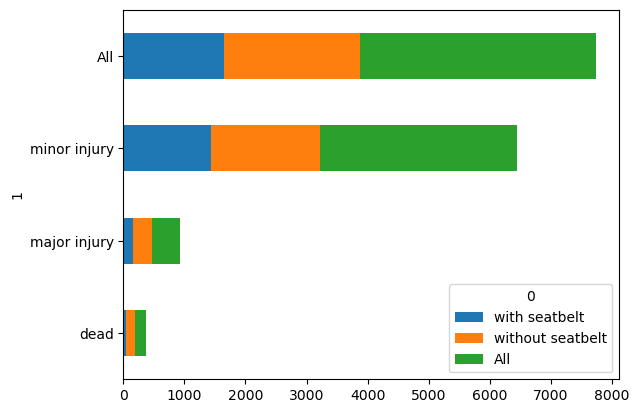

In [4]:
survivors.plot(kind='barh', stacked=True);

### $\chi^2$ 검정
- 범주형 변수 간 관련성이 모집다에서 존재하는지 검정
- $\chi^2$ 검정은 기대빈도(변수 간 서로 관련성이 없을 때 기대할 수 있는 예상 빈도)와 관측빈도(교차표 상의 실제 빈도)의 비교를 통해 계산되는 $\chi^2$ 값을 검정통계량으로 사용
- 통계적으로 유의할 경우 변수간 관련성 존재
$$ \chi^2 = \sum_{ij}\frac{(o_{ij}-e_{ij})^2}{e_{ij}},\quad df=(행\ 변수의\ 범주\ 갯수-1)\times (열\ 변수의\ 범주\ 갯수-1)$$
- 예시)
  - 안전벨트 & 경상 기대빈도= 83.3% * 1641 = 1367.0
  - 안전벨트 X & 경상 기대빈도 = 83.3% * 2228 = 1855.9
  - 안전벨트 & 중상 기대빈도= 12.0% * 1641 = 196.9
  - 안전벨트 X & 중상 기대빈도 = 12.0% * 2228 = 267.4
  - 안전벨트 & 사망 기대빈도= 4.7% * 1641 = 77.1
  - 안전벨트 X & 사망 기대빈도 = 4.7% * 2228 = 104.7
  $\chi^2=\frac{(1443-1367)^2}{1367}+\frac{(1781-1855.9)^2}{1855.9}+\frac{(151-196.9)^2}{196.9}+\frac{(312-167.4)^2}{267.4}+\frac{(47-77.1)^2}{77.1}+\frac{(135-104.7)^2}{104.7}=45.91$

In [5]:
1-stats.chi2.cdf(45.91, df =(3-1)*(2-1) )

1.0734213518048819e-10

In [6]:
stats.chi2.ppf(1-0.05, df=2)

5.991464547107979

## 5.2 독립성 검정
- 두 범주형 변수가 서로 독립인지 검정

In [7]:
titanic = pd.read_csv('data/titanic.csv').drop(columns='rownames')
titanic.head()

,class,age,sex,survived
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [8]:
titanic_ct = pd.crosstab(index=titanic['survived'], columns=titanic['class'])#, margins=True, normalize='columns')
titanic_ct

class,1,2,3,4
survived,,,,
0,122,167,528,673
1,203,118,178,212


In [9]:
stats.chi2_contingency(titanic_ct)

Chi2ContingencyResult(statistic=190.40110361683327, pvalue=4.999927529868003e-41, dof=3, expected_freq=array([[220.01363017, 192.93502953, 477.93730123, 599.11403907],
       [104.98636983,  92.06497047, 228.06269877, 285.88596093]]))

## 5.3 적합성 검정
- 범주형 변수가 하나일 때 범주별 비율 분포에 대한 가설 검정
- 관측한 빈도를 토대로 모집단에서의 집단 별 비율 분포 검정

In [10]:
telecom_user = [60,55,35]
stats.chisquare(telecom_user)

Power_divergenceResult(statistic=7.0, pvalue=0.0301973834223185)

In [11]:
stats.chisquare(telecom_user, [0.45*(60+55+35), 0.30*(60+55+35), 0.25*(60+55+35)])

Power_divergenceResult(statistic=3.2222222222222223, pvalue=0.19966564006790188)

In [12]:
stats.chisquare(telecom_user,[45/85*(60+55+35), 25/85*(60+55+35), 15/85*(60+55+35)])

Power_divergenceResult(statistic=10.177777777777774, pvalue=0.0061648659341430895)

In [13]:
haireye = pd.read_csv("data/HairEyeColor.csv").drop(columns='rownames')
haireye.head()

,Hair,Eye,Sex,Freq
0,Black,Brown,Male,32
1,Brown,Brown,Male,53
2,Red,Brown,Male,10
3,Blond,Brown,Male,3
4,Black,Blue,Male,11


In [34]:
temp = []
for idx in list(haireye['Hair'].value_counts().index):
    temp.append(sum(haireye.loc[haireye['Hair']==idx, 'Freq']))
ratio_temp = np.divide(temp, sum(temp))

# 만약 각 25 50 10 15의 비율을 주장한다면?
stats.chisquare(ratio_temp, [0.25, 0.5, 0.1, 0.15])

Power_divergenceResult(statistic=0.05056344351107865, pvalue=0.9970215146510665)